### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.utils import shuffle

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from tensorflow.keras.optimizers import Adam

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

tf.random.set_seed(0)

### Data Exploration

In [2]:
df = pd.read_csv("bronxbinarytrain.csv")

In [3]:
df

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,LotArea,LotDepth,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period,ComplaintType
0,1268,35.0,0.35,2.0,2.0,3650,95.00,1.67,2628,1268,0.90,2458,50,70,0
1,7839,45.0,3.08,2.0,3.0,4275,45.00,5.00,2628,6018,3.00,2458,83,103,0
2,1910,30.0,0.65,2.0,1.0,2917,58.33,2.00,2628,1910,0.60,2458,-6,14,0
3,1968,40.0,0.39,2.0,1.0,5000,100.00,2.50,2628,1968,0.60,2458,75,95,1
4,924,30.0,0.51,2.0,2.0,1800,100.00,2.00,2628,924,0.90,2458,75,95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89849,2340,46.0,0.90,2.0,4.8,2500,100.00,2.00,2628,2000,3.44,2458,65,85,1
89850,3432,52.0,1.51,2.0,2.0,2266,103.00,3.00,2628,3432,1.10,2458,35,55,1
89851,2420,47.0,1.10,2.0,2.0,2204,100.17,2.00,2628,1760,0.90,2458,45,65,1
89852,2320,58.0,0.93,2.0,2.0,2500,100.00,2.00,2628,2320,0.90,2458,80,100,1


In [4]:
df.isnull().sum()

BldgArea         0
BldgDepth        0
BuiltFAR         0
CommFAR          0
FacilFAR         0
LotArea          0
LotDepth         0
NumFloors        0
OfficeArea       0
ResArea          0
ResidFAR         0
RetailArea       0
Age              0
Period           0
ComplaintType    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89854 entries, 0 to 89853
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BldgArea       89854 non-null  int64  
 1   BldgDepth      89854 non-null  float64
 2   BuiltFAR       89854 non-null  float64
 3   CommFAR        89854 non-null  float64
 4   FacilFAR       89854 non-null  float64
 5   LotArea        89854 non-null  int64  
 6   LotDepth       89854 non-null  float64
 7   NumFloors      89854 non-null  float64
 8   OfficeArea     89854 non-null  int64  
 9   ResArea        89854 non-null  int64  
 10  ResidFAR       89854 non-null  float64
 11  RetailArea     89854 non-null  int64  
 12  Age            89854 non-null  int64  
 13  Period         89854 non-null  int64  
 14  ComplaintType  89854 non-null  int64  
dtypes: float64(7), int64(8)
memory usage: 10.3 MB


In [6]:
df.describe(include='all')

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,LotArea,LotDepth,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period,ComplaintType
count,89854.000000,89854.000000,89854.000000,89854.000000,89854.000000,89854.000000,89854.000000,89854.000000,89854.000000,89854.000000,89854.000000,89854.000000,89854.000000,89854.000000,89854.000000
mean,3023.194026,50.294414,1.082459,1.969679,2.878297,3712.115064,98.212669,2.375609,2608.339072,2350.192345,1.734596,2419.994536,56.995092,77.179146,0.502493
std,2010.530805,19.907146,0.711358,0.179440,1.576991,2576.492232,16.852655,1.043984,181.223220,1325.998493,1.254187,228.640254,28.762429,28.716494,0.499997
min,1.000000,2.000000,0.010000,0.500000,1.000000,1.000000,0.080000,0.500000,50.000000,100.000000,0.500000,100.000000,-91.000000,3.000000,0.000000
25%,1771.000000,36.000000,0.640000,2.000000,2.000000,2200.000000,95.000000,2.000000,2628.000000,1482.000000,0.900000,2458.000000,40.000000,60.000000,0.000000
50%,2340.000000,46.000000,0.900000,2.000000,2.000000,2513.000000,100.000000,2.000000,2628.000000,2000.000000,1.250000,2458.000000,65.000000,85.000000,1.000000
75%,3288.000000,55.000000,1.250000,2.000000,4.800000,4250.000000,102.420000,3.000000,2628.000000,2616.000000,2.430000,2458.000000,75.000000,95.000000,1.000000
max,7839.000000,112.000000,3.080000,2.000000,10.000000,10400.000000,124.680000,6.000000,2628.000000,6018.000000,7.020000,2458.000000,180.000000,200.000000,1.000000


In [7]:
df.shape

(89854, 15)

In [8]:
df.columns

Index(['BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'LotArea',
       'LotDepth', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR',
       'RetailArea', 'Age', 'Period', 'ComplaintType'],
      dtype='object')

### Data Preprocessing

### Treat Duplicate Values

In [9]:
df.duplicated(keep='first').sum()

14968

In [10]:
df[df.duplicated(keep=False)]

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,LotArea,LotDepth,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period,ComplaintType
0,1268,35.0,0.35,2.0,2.0,3650,95.00,1.67,2628,1268,0.90,2458,50,70,0
2,1910,30.0,0.65,2.0,1.0,2917,58.33,2.00,2628,1910,0.60,2458,-6,14,0
4,924,30.0,0.51,2.0,2.0,1800,100.00,2.00,2628,924,0.90,2458,75,95,0
10,1600,40.0,0.64,2.0,2.0,2500,100.00,2.00,2628,1600,0.90,2458,75,95,0
12,1782,33.0,0.62,2.0,2.0,2884,109.50,3.00,2628,1782,0.90,2458,45,65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89840,1050,34.0,0.42,2.0,1.0,2500,100.00,2.00,2628,1050,0.60,2458,80,100,1
89842,3132,55.0,1.65,2.0,2.0,1898,94.90,2.00,2628,2088,1.10,2458,90,110,1
89845,1998,37.0,1.11,2.0,1.0,1800,100.00,3.00,2628,1998,0.60,2458,40,60,1
89849,2340,46.0,0.90,2.0,4.8,2500,100.00,2.00,2628,2000,3.44,2458,65,85,1


In [11]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [12]:
df

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,LotArea,LotDepth,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period,ComplaintType
0,1268,35.0,0.35,2.0,2.0,3650,95.00,1.67,2628,1268,0.90,2458,50,70,0
1,7839,45.0,3.08,2.0,3.0,4275,45.00,5.00,2628,6018,3.00,2458,83,103,0
2,1910,30.0,0.65,2.0,1.0,2917,58.33,2.00,2628,1910,0.60,2458,-6,14,0
3,1968,40.0,0.39,2.0,1.0,5000,100.00,2.50,2628,1968,0.60,2458,75,95,1
4,924,30.0,0.51,2.0,2.0,1800,100.00,2.00,2628,924,0.90,2458,75,95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74881,7839,83.0,1.99,1.0,2.4,10400,124.68,3.00,2628,2000,1.25,2458,-13,7,1
74882,2340,46.0,0.90,2.0,2.0,5140,106.80,2.00,2628,2000,0.90,2458,65,85,1
74883,3432,52.0,1.51,2.0,2.0,2266,103.00,3.00,2628,3432,1.10,2458,35,55,1
74884,2320,58.0,0.93,2.0,2.0,2500,100.00,2.00,2628,2320,0.90,2458,80,100,1


### Train Test Split

In [13]:
X = df.iloc[:,0:14]
y = df.iloc[:,14]

### Treat Imbalance Data

In [14]:
y.value_counts()

1    37551
0    37335
Name: ComplaintType, dtype: int64

In [15]:
ros = RandomOverSampler(sampling_strategy='all',random_state=0)

In [16]:
new_X, new_y = ros.fit_resample(X, y)

In [17]:
new_y.value_counts()

1    37551
0    37551
Name: ComplaintType, dtype: int64

In [18]:
new_X

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,LotArea,LotDepth,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period
0,1268,35.00,0.35,2.0,2.0,3650,95.00,1.67,2628,1268,0.90,2458,50,70
1,7839,45.00,3.08,2.0,3.0,4275,45.00,5.00,2628,6018,3.00,2458,83,103
2,1910,30.00,0.65,2.0,1.0,2917,58.33,2.00,2628,1910,0.60,2458,-6,14
3,1968,40.00,0.39,2.0,1.0,5000,100.00,2.50,2628,1968,0.60,2458,75,95
4,924,30.00,0.51,2.0,2.0,1800,100.00,2.00,2628,924,0.90,2458,75,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75097,3300,55.00,1.74,2.0,4.8,1900,95.00,3.00,2628,3300,3.44,2458,95,115
75098,2580,50.00,1.03,2.0,2.0,2500,100.00,2.50,2628,2040,0.90,2458,50,70
75099,2664,39.75,1.14,2.0,2.0,2334,100.00,3.00,2628,2664,0.90,2458,1,21
75100,7839,102.00,3.08,2.0,6.5,10400,124.68,6.00,2628,6018,6.02,2458,73,93


In [19]:
X_train, X_test, y_train, y_test = train_test_split(new_X.values, new_y.values, test_size=0.2, random_state=0)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60081, 14), (15021, 14), (60081,), (15021,))

### Feature Scaling (If not using Batch Normalization)

In [21]:
X_train

array([[2.120e+03, 5.300e+01, 8.500e-01, ..., 2.458e+03, 6.500e+01,
        1.000e+02],
       [5.310e+03, 1.060e+02, 9.900e-01, ..., 2.458e+03, 6.800e+01,
        8.800e+01],
       [3.340e+03, 5.200e+01, 1.520e+00, ..., 2.458e+03, 1.300e+01,
        3.300e+01],
       ...,
       [3.500e+03, 5.058e+01, 7.600e-01, ..., 2.458e+03, 1.500e+01,
        3.500e+01],
       [2.709e+03, 5.000e+01, 1.350e+00, ..., 2.458e+03, 1.010e+02,
        1.210e+02],
       [1.116e+03, 3.450e+01, 3.900e-01, ..., 2.458e+03, 7.000e+01,
        9.000e+01]])

In [22]:
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)

In [24]:
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled

array([[-0.4886674 ,  0.09511982, -0.32433289, ...,  0.18139025,
         0.22932016,  0.74406443],
       [ 1.01756922,  2.64169132, -0.13819805, ...,  0.18139025,
         0.33338617,  0.32672869],
       [ 0.08738548,  0.04707131,  0.56645531, ...,  0.18139025,
        -1.57449066, -1.58606012],
       ...,
       [ 0.16293339, -0.02115759, -0.44399101, ...,  0.18139025,
        -1.50511332, -1.51650416],
       [-0.21055663, -0.04902573,  0.34043442, ...,  0.18139025,
         1.47811226,  1.47440198],
       [-0.96273058, -0.79377777, -0.93591883, ...,  0.18139025,
         0.40276351,  0.39628465]])

In [26]:
X_test_scaled

array([[-0.806913  , -0.33731684, -0.57694447, ...,  0.18139025,
        -0.11756654, -0.12538503],
       [ 0.24414741,  0.23926538,  0.28725304, ...,  0.18139025,
         0.92309355,  0.91795432],
       [-0.80974605, -1.73072389, -0.72319328, ...,  0.18139025,
         0.92309355,  0.91795432],
       ...,
       [ 0.621887  ,  0.33536242, -0.96250952, ...,  0.18139025,
        -1.67855666, -1.69039405],
       [-0.09676257, -0.04902573,  0.93872501, ...,  0.18139025,
        -0.81133993, -0.8209446 ],
       [ 0.21581694,  0.23926538,  0.44679719, ...,  0.18139025,
         0.57620686,  0.57017454]])

### Model Training

### Using SciKit-Learn

In [ ]:
modelsk =  MLPClassifier(hidden_layer_sizes=(100,),max_iter=100,random_state=0)

In [ ]:
modelsk.fit(X_train_scaled,y_train)

In [ ]:
modelsk.predict(X_test_scaled)

In [ ]:
y_pred = modelsk.predict(X_test_scaled)

In [ ]:
y_pred

### Model Evaluation

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

In [ ]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
fig , ax = plt.subplots(figsize=(10,5))
plot_confusion_matrix(modelsk,X_test_scaled,y_test,values_format='.4g',ax=ax)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
plot_roc_curve(modelsk,X_test,y_test)
plt.show()

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mse

In [ ]:
rmse = np.sqrt(mse)
rmse

In [ ]:
r2score = r2_score(y_test,y_pred)
r2score

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

### Using DNN

In [27]:
model = Sequential()
model.add(Dense(units=32,activation='relu',input_dim=14))
model.add(Dropout(0.1))
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1,activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                480       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,569
Trainable params: 1,569
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])

In [30]:
model_history = model.fit(X_train_scaled, y_train,batch_size=500,epochs=20,
                          validation_split=0.2, verbose=2)

Train on 48064 samples, validate on 12017 samples
Epoch 1/20
48064/48064 - 1s - loss: 0.7009 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.5076
Epoch 2/20
48064/48064 - 0s - loss: 0.6970 - accuracy: 0.4960 - val_loss: 0.6929 - val_accuracy: 0.5107
Epoch 3/20
48064/48064 - 0s - loss: 0.6946 - accuracy: 0.5024 - val_loss: 0.6935 - val_accuracy: 0.5069
Epoch 4/20
48064/48064 - 0s - loss: 0.6941 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.5050
Epoch 5/20
48064/48064 - 0s - loss: 0.6933 - accuracy: 0.5114 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 6/20
48064/48064 - 0s - loss: 0.6935 - accuracy: 0.5074 - val_loss: 0.6933 - val_accuracy: 0.5026
Epoch 7/20
48064/48064 - 0s - loss: 0.6932 - accuracy: 0.5070 - val_loss: 0.6936 - val_accuracy: 0.4967
Epoch 8/20
48064/48064 - 0s - loss: 0.6932 - accuracy: 0.5067 - val_loss: 0.6936 - val_accuracy: 0.4980
Epoch 9/20
48064/48064 - 0s - loss: 0.6932 - accuracy: 0.5102 - val_loss: 0.6937 - val_accuracy: 0.4942
Epoch 10/20
48

In [31]:
model_history.params

{'batch_size': 500,
 'epochs': 20,
 'steps': 97,
 'samples': 48064,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [32]:
model_history.history

{'loss': [0.7009193669116688,
  0.6969686267666826,
  0.6946384024306557,
  0.6940673852014478,
  0.6933405616143334,
  0.6935150144341465,
  0.6932372158460229,
  0.6932162166524743,
  0.6932468203239927,
  0.6930648257606198,
  0.6931118534334728,
  0.6927361597025521,
  0.6924939035287948,
  0.6923516381199605,
  0.6927803414470743,
  0.6924938536565329,
  0.6922684932566594,
  0.6923994911008684,
  0.692305414851869,
  0.6920608050783925],
 'accuracy': [0.49908456,
  0.49602613,
  0.50235105,
  0.5053262,
  0.5114431,
  0.5074484,
  0.5069907,
  0.5067202,
  0.5101947,
  0.5092793,
  0.50809336,
  0.5115055,
  0.51404375,
  0.51165116,
  0.5126082,
  0.5145431,
  0.513378,
  0.5145431,
  0.5155418,
  0.518621],
 'val_loss': [0.6931528334382708,
  0.6929071700353734,
  0.6935410424676346,
  0.6931610269713959,
  0.693361237425668,
  0.6933046246543149,
  0.6935878375202127,
  0.6936409183952013,
  0.6936663527888288,
  0.6937025241529603,
  0.6937054003585523,
  0.6936815237209326,


In [33]:
pd.DataFrame(model_history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.700919,0.499085,0.693153,0.507614
1,0.696969,0.496026,0.692907,0.510693
2,0.694638,0.502351,0.693541,0.506865
3,0.694067,0.505326,0.693161,0.504951
4,0.693341,0.511443,0.693361,0.500042
5,0.693515,0.507448,0.693305,0.502621
6,0.693237,0.506991,0.693588,0.496713
7,0.693216,0.506720,0.693641,0.498044
8,0.693247,0.510195,0.693666,0.494217
9,0.693065,0.509279,0.693703,0.498211


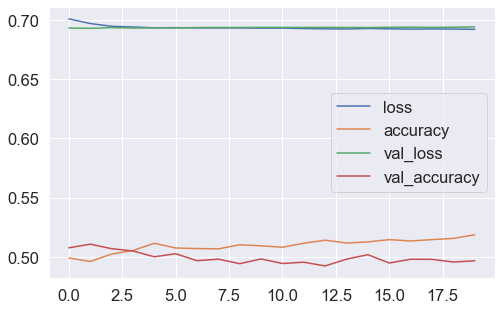

In [34]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()#.set_ylim(0,1)
plt.show()

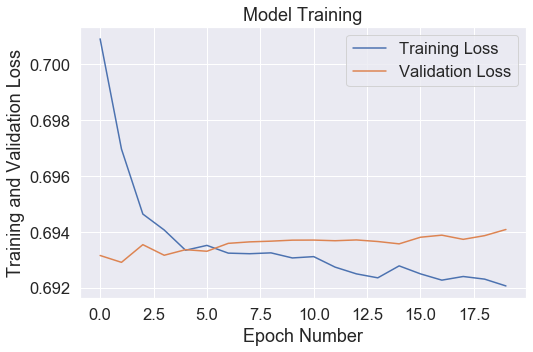

In [35]:
plt.figure(figsize=(8,5))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Training")
plt.ylabel("Training and Validation Loss")
plt.xlabel("Epoch Number")
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [36]:
model.evaluate(X_test_scaled,y_test)

15021/15021 [==============================] - 0s 29us/sample - loss: 0.6946 - accuracy: 0.4974


[0.6946243053269556, 0.4974369]

In [37]:
y_test

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

### Model Evaluation

In [38]:
y_pred = model.predict(X_test_scaled)

In [39]:
y_pred

array([[0.51298165],
       [0.49128065],
       [0.508266  ],
       ...,
       [0.4952    ],
       [0.5062336 ],
       [0.4938808 ]], dtype=float32)

In [40]:
y_pred.round(2)

array([[0.51],
       [0.49],
       [0.51],
       ...,
       [0.5 ],
       [0.51],
       [0.49]], dtype=float32)

In [41]:
y_class_pred =  model.predict_classes(X_test_scaled)

In [42]:
y_class_pred 

array([[1],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [43]:
cm = confusion_matrix(y_test,y_class_pred)
cm

array([[4386, 3137],
       [4412, 3086]], dtype=int64)

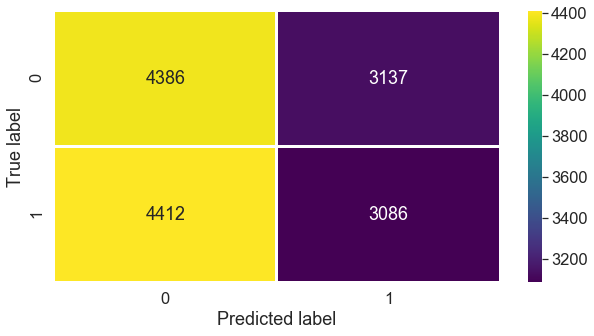

In [44]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

ValueError: plot_confusion_matrix only supports classifiers

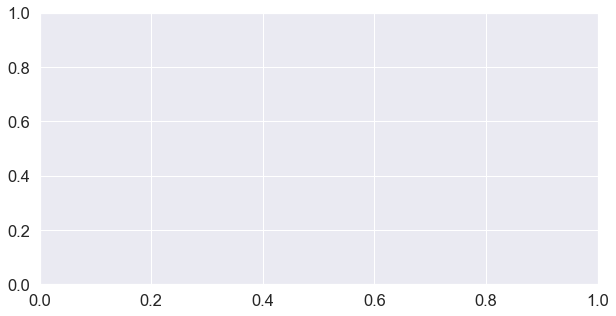

In [45]:
fig , ax = plt.subplots(figsize=(10,5))
plot_confusion_matrix(model,X_test_scaled,y_test,values_format='.4g',ax=ax)
plt.show()

In [46]:
print(classification_report(y_test,y_class_pred))

              precision    recall  f1-score   support

           0       0.50      0.58      0.54      7523
           1       0.50      0.41      0.45      7498

    accuracy                           0.50     15021
   macro avg       0.50      0.50      0.49     15021
weighted avg       0.50      0.50      0.49     15021



In [47]:
plot_roc_curve(model,X_test,y_test)
plt.show()

ValueError: Sequential should be a binary classifer

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mse

In [ ]:
rmse = np.sqrt(mse)
rmse

In [ ]:
r2score = r2_score(y_test,y_pred)
r2score

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

### Cross Validation

In [ ]:
def build_classifier():
    model = Sequential()
    model.add(Dense(units=32,activation='relu',input_dim=14))
    model.add(Dense(units=32,activation='relu'))
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])
    return model

In [ ]:
model = KerasClassifier(build_fn=build_classifier, batch_size=100, epochs=10)

In [ ]:
cv = cross_val_score(estimator=model,X=X_train, y=y_train, cv=5, n_jobs=-1)

In [ ]:
cv

In [ ]:
cv.mean()

In [ ]:
cv.std()

### Model Tuning

In [ ]:
def build_classifier(optimizer):
    model = Sequential()
    model.add(Dense(units=32,activation='relu',input_dim=14))
    model.add(Dense(units=32,activation='relu'))
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["accuracy"])
    return model

In [ ]:
model = KerasClassifier(build_fn=build_classifier)

In [ ]:
params = {'batch_size':[200,500],
          'epochs' : [10,20,30],
          'optimizer' : ['Adam', 'RMSprop']
         
         }

### Use RandomSearch CV

In [ ]:
randomsearch = RandomizedSearchCV(estimator=model, param_distributions=params,n_iter=30,
                                  scoring='accuracy',n_jobs=-1,cv=5)

In [ ]:
randomsearchcv = randomsearch.fit(X_train, y_train)

In [ ]:
randomsearchcv.best_params_

In [ ]:
randomsearchcv.best_score_

### Use GridSearch CV

In [ ]:
grid = GridSearchCV(estimator=classifier, param_grid=params, verbose=1, n_jobs=-1, scoring='accuracy',cv=5)

In [ ]:
grid.fit(X_train,y_train)

### Save the Model

In [ ]:
filename = 'model.sav'
dump(xgbnew,open(filename,'wb'))